# Characterising different lamina connections 

Is there a useful way to group the different connection types by the structure of their variability? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib as mpl
import seaborn as sns
import itertools
import os.path
#from sklearn.linear_model import LinearRegression
from scipy.stats import zscore

from cx_analysis.utils import yymmdd_today
from cx_analysis.dataframe_tools import assemble_cxvectors
from cx_analysis.vis.hex_lattice import hexplot
from cx_analysis.vis.fig_tools import linear_cmap, subtype_cm

In [2]:
plt.rcdefaults()
plt.style.use('../cx_analysis/vis/lamina.mplstyle') # may not work if installed as a module

mpl.rcParams['font.family'] = ['arial', 'sans-serif']
mpl.rcParams['font.size'] = 6.0
cm = subtype_cm()

### SAVE FIGS? ###
save_figs = True
if save_figs:
    fig_path = os.path.expanduser(f'~/Desktop/lamina_resubmit_figs')

## Connections observed in the lamina

In [3]:
# Load dataframe of om->[connection counts]
tp = '210809'
lamina_links = pd.read_pickle(f'~/Data/{tp}_lamina/{tp}_linkdf.pickle')
print(lamina_links)

#lamina_links.to_excel(f'~/Data/{tp}_lamina/{tp}_all_links.xlsx')

      link_id   cx_id      pre_neuron pre_om pre_type pre_skel  \
0      194220  276258         omB6_LN     B6    LMC_N       25   
1      175596  276258         omB6_LN     B6    LMC_N       25   
2      175139  276258         omB6_LN     B6    LMC_N       25   
3      175128  276258         omB6_LN     B6    LMC_N       25   
4      175628  277482         omB6_LN     B6    LMC_N       25   
...       ...     ...             ...    ...      ...      ...   
20774  318465  479967  omC2_centri_nc     C2   centri   319210   
20775  318468  479967  omC2_centri_nc     C2   centri   319210   
20776  318467  479967  omC2_centri_nc     C2   centri   319210   
20777  318466  479967  omC2_centri_nc     C2   centri   319210   
20778  318464  479967  omC2_centri_nc     C2   centri   319210   

          post_neuron  post_om  post_type post_skel  
0             omB6_L1       B6      LMC_1    175606  
1             omB6_L2       B6      LMC_2     44725  
2             omB6_L1       B6      LMC_1    

In [4]:
subtypes = np.unique([*lamina_links["pre_type"], *lamina_links["post_type"]])

all_ctypes = [p for p in itertools.product(subtypes, subtypes)]  
all_ctype_labels = [f"{pre}->{post}" for pre, post in all_ctypes]
ommatidia = ommatidia = np.unique(lamina_links['pre_om'])

all_cxvecs = assemble_cxvectors(lamina_links)  # each om has a vector of connection counts

In [5]:
# Connection types with a mean count of less than thresh will not be used for clustering
thresh = 1.0

display(len(all_cxvecs.columns))
for cx, v in all_cxvecs.iteritems():
    if any(v.isna()):
        print(cx)
cxvecs = all_cxvecs.loc[:, all_cxvecs.mean() > thresh].fillna(0.0)  
#display(len(cxvecs.columns))
cxvecs = cxvecs.rename_axis(index='om')
display(cxvecs.describe())


#cxvecs.to_csv(os.path.expanduser('~/Desktop/cxvecs_nonzero.csv'))

136

,LMC_2->LMC_1,LMC_2->LMC_2,LMC_2->LMC_3,LMC_2->LMC_4,LMC_2->R7,LMC_2->R7p,LMC_2->R8,LMC_2->R_duet,LMC_2->centri,LMC_N->LMC_1,...,centri->R7p,centri->R8,centri->R_duet,centri->R_quartet,centri->centri,R_quartet->eLMC_2,R_quartet->eLMC_4,R_duet->eLMC_4,LMC_2->eLMC_4,centri->eLMC_4
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,21.931034,5.137931,13.034483,13.827586,2.000000,4.241379,2.551724,1.551724,3.965517,3.517241,...,23.931034,15.655172,22.344828,2.793103,2.448276,5.517241,6.517241,6.241379,8.862069,1.758621
std,4.854534,4.501779,6.790133,9.384900,2.283481,3.785830,1.992597,2.197177,4.178882,3.804327,...,6.278825,5.373718,6.183364,1.698304,1.900868,10.520798,9.876454,6.817285,8.153545,2.429803
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13.000000,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,1.000000,9.000000,7.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,...,19.000000,12.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,4.000000,12.000000,17.000000,1.000000,3.000000,3.000000,0.000000,3.000000,2.000000,...,23.000000,14.000000,23.000000,3.000000,2.000000,0.000000,4.000000,5.000000,10.000000,0.000000
75%,24.000000,8.000000,16.000000,18.000000,3.000000,6.000000,4.000000,3.000000,5.000000,5.000000,...,29.000000,18.000000,27.000000,4.000000,4.000000,11.000000,9.000000,11.000000,16.000000,3.000000
max,33.000000,16.000000,30.000000,33.000000,8.000000,18.000000,7.000000,8.000000,18.000000,16.000000,...,37.000000,28.000000,31.000000,6.000000,7.000000,41.000000,49.000000,27.000000,25.000000,8.000000


## Clustering the correlation matrix of all connections including those between cartridges

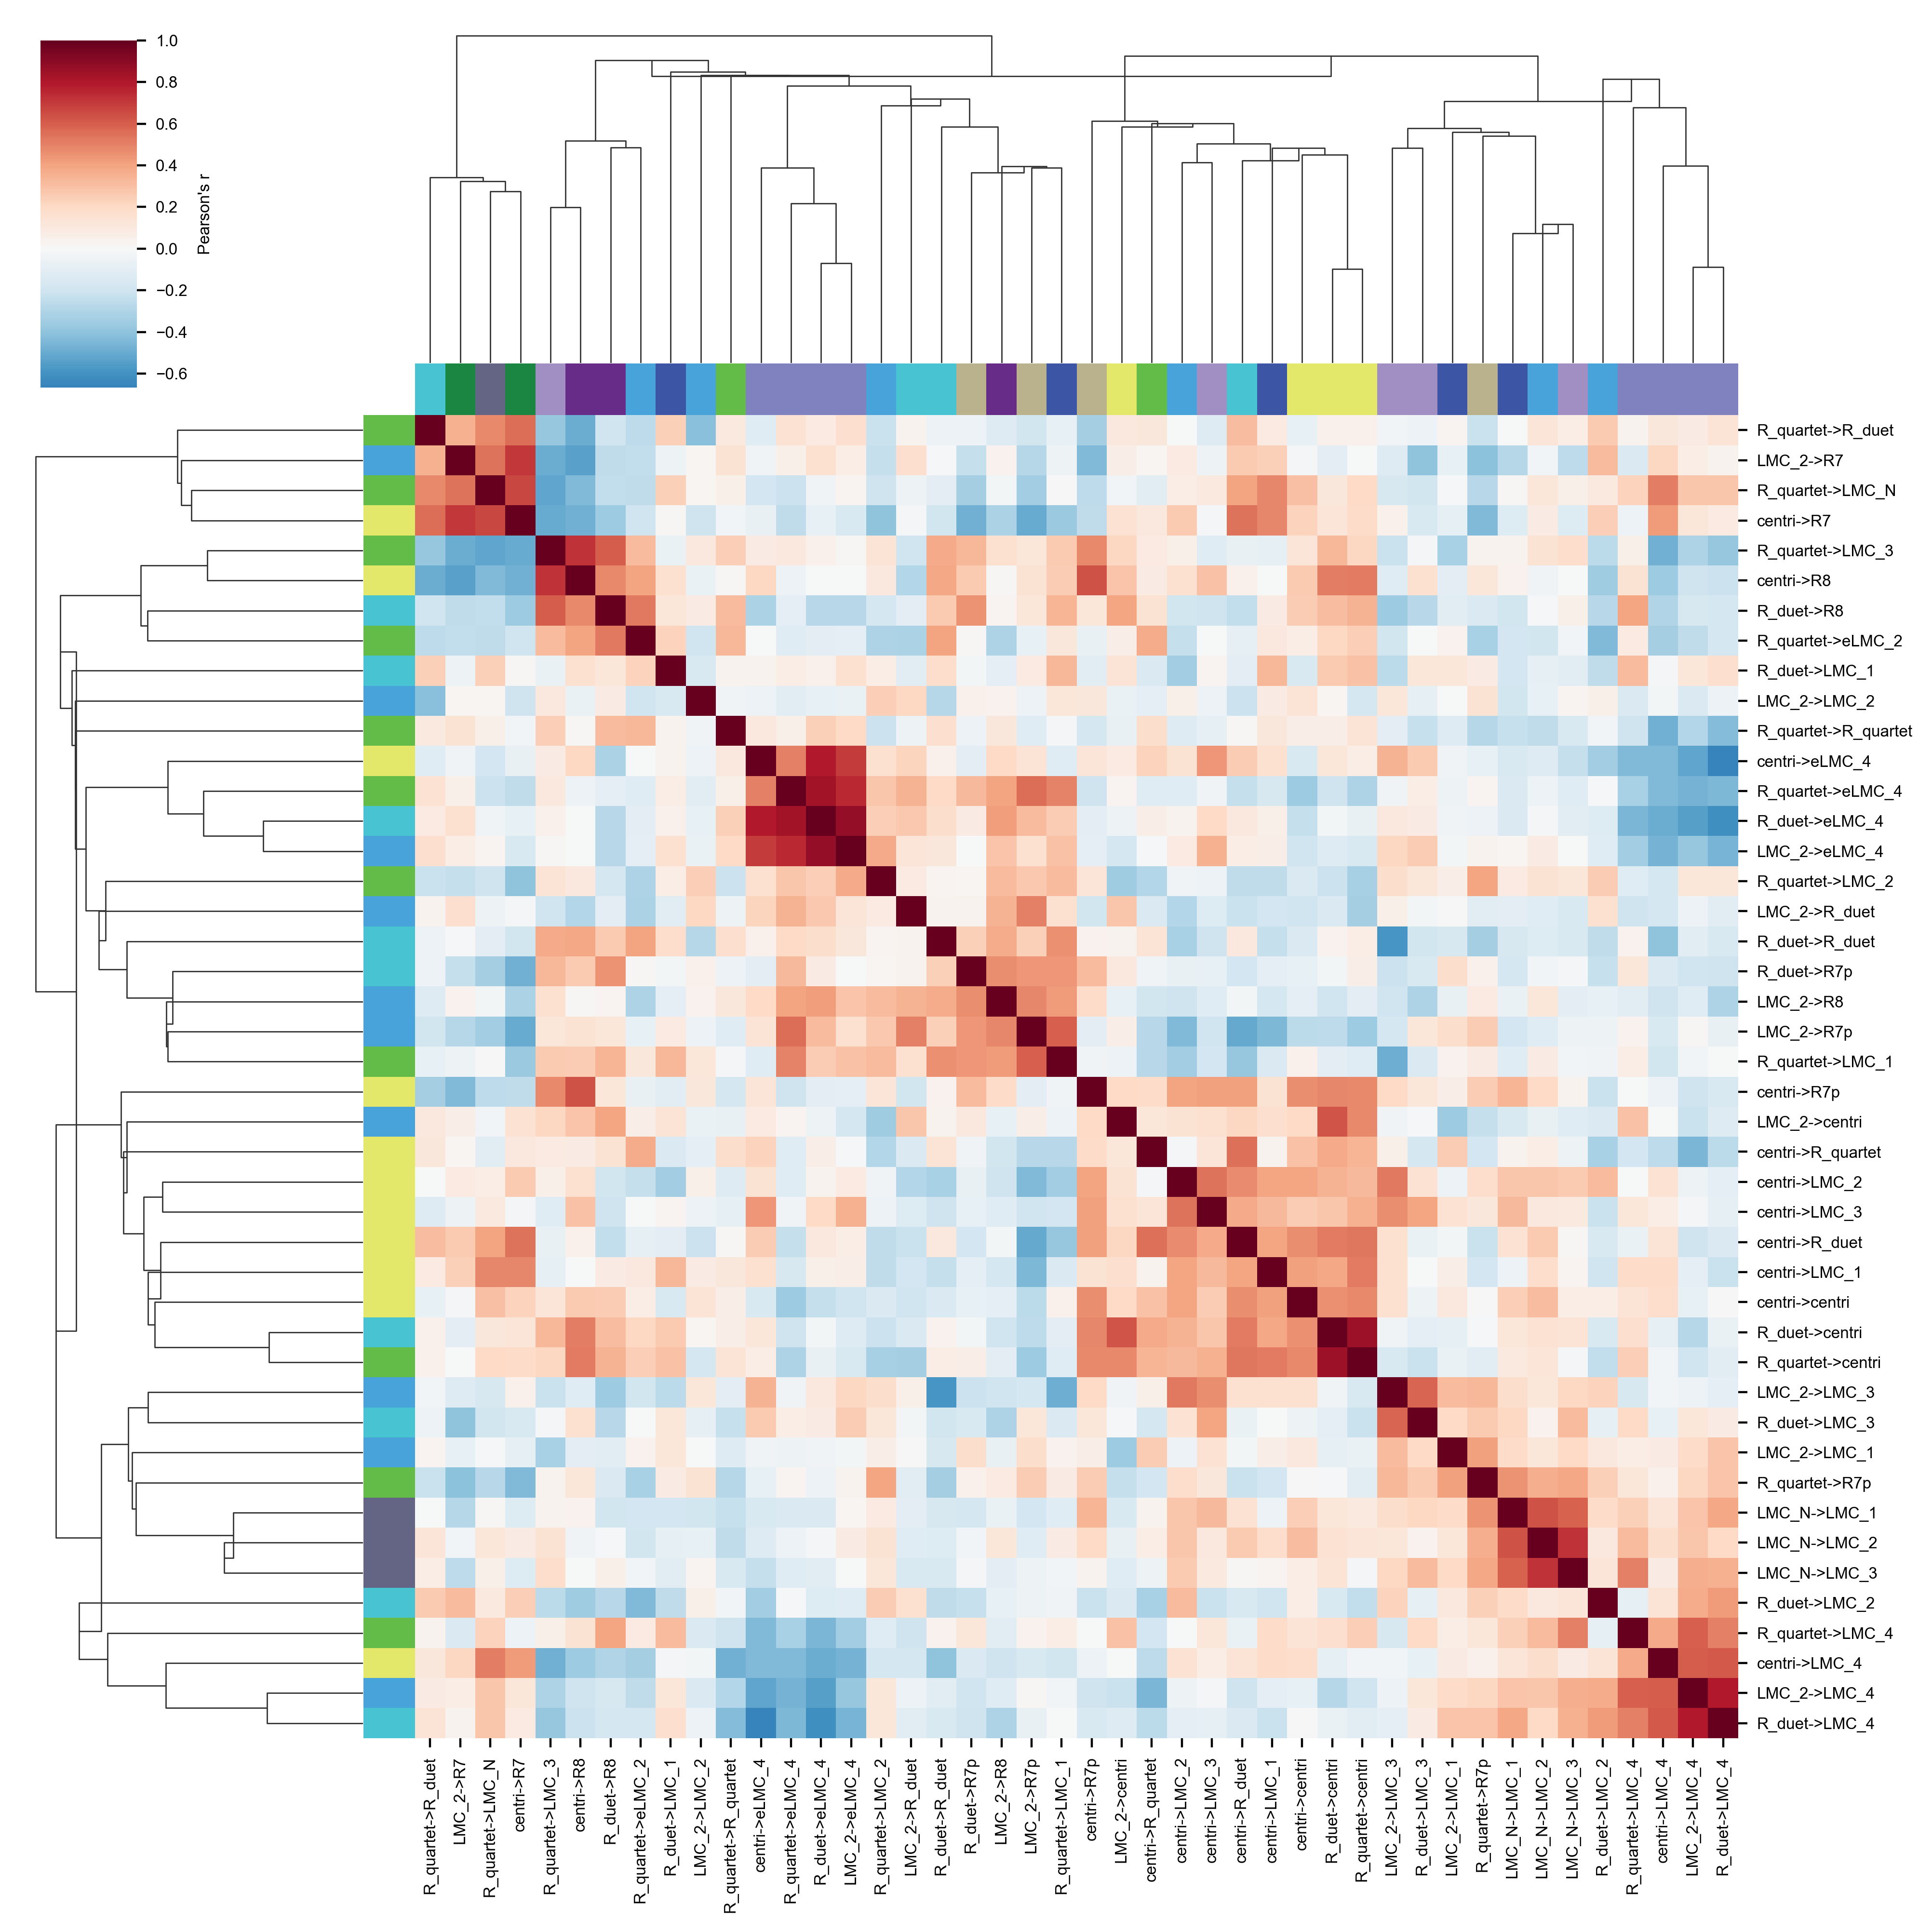

In [6]:
# INCLUDE INTEROM CONNECTIONS
data = cxvecs

z = data.apply(zscore)
corr_z = z.corr()
#print(corr_z)

x_c = [cm[x.split('->')[0]] for x in corr_z.index]
y_c = [cm[x.split('->')[1]] for x in corr_z.columns]

clus = sns.clustermap(corr_z, metric='euclidean', method='centroid', 
                      cmap='RdBu_r', cbar_kws={'label': "Pearson's r"}, center=0, 
                      row_colors=x_c, col_colors=y_c)
# if save_figs:
#     clus.savefig(fig_path + f'cx-clus_all-cx-mean1.svg')
#     clus.savefig(fig_path + f'om-clus_all-cx-mean1.png')

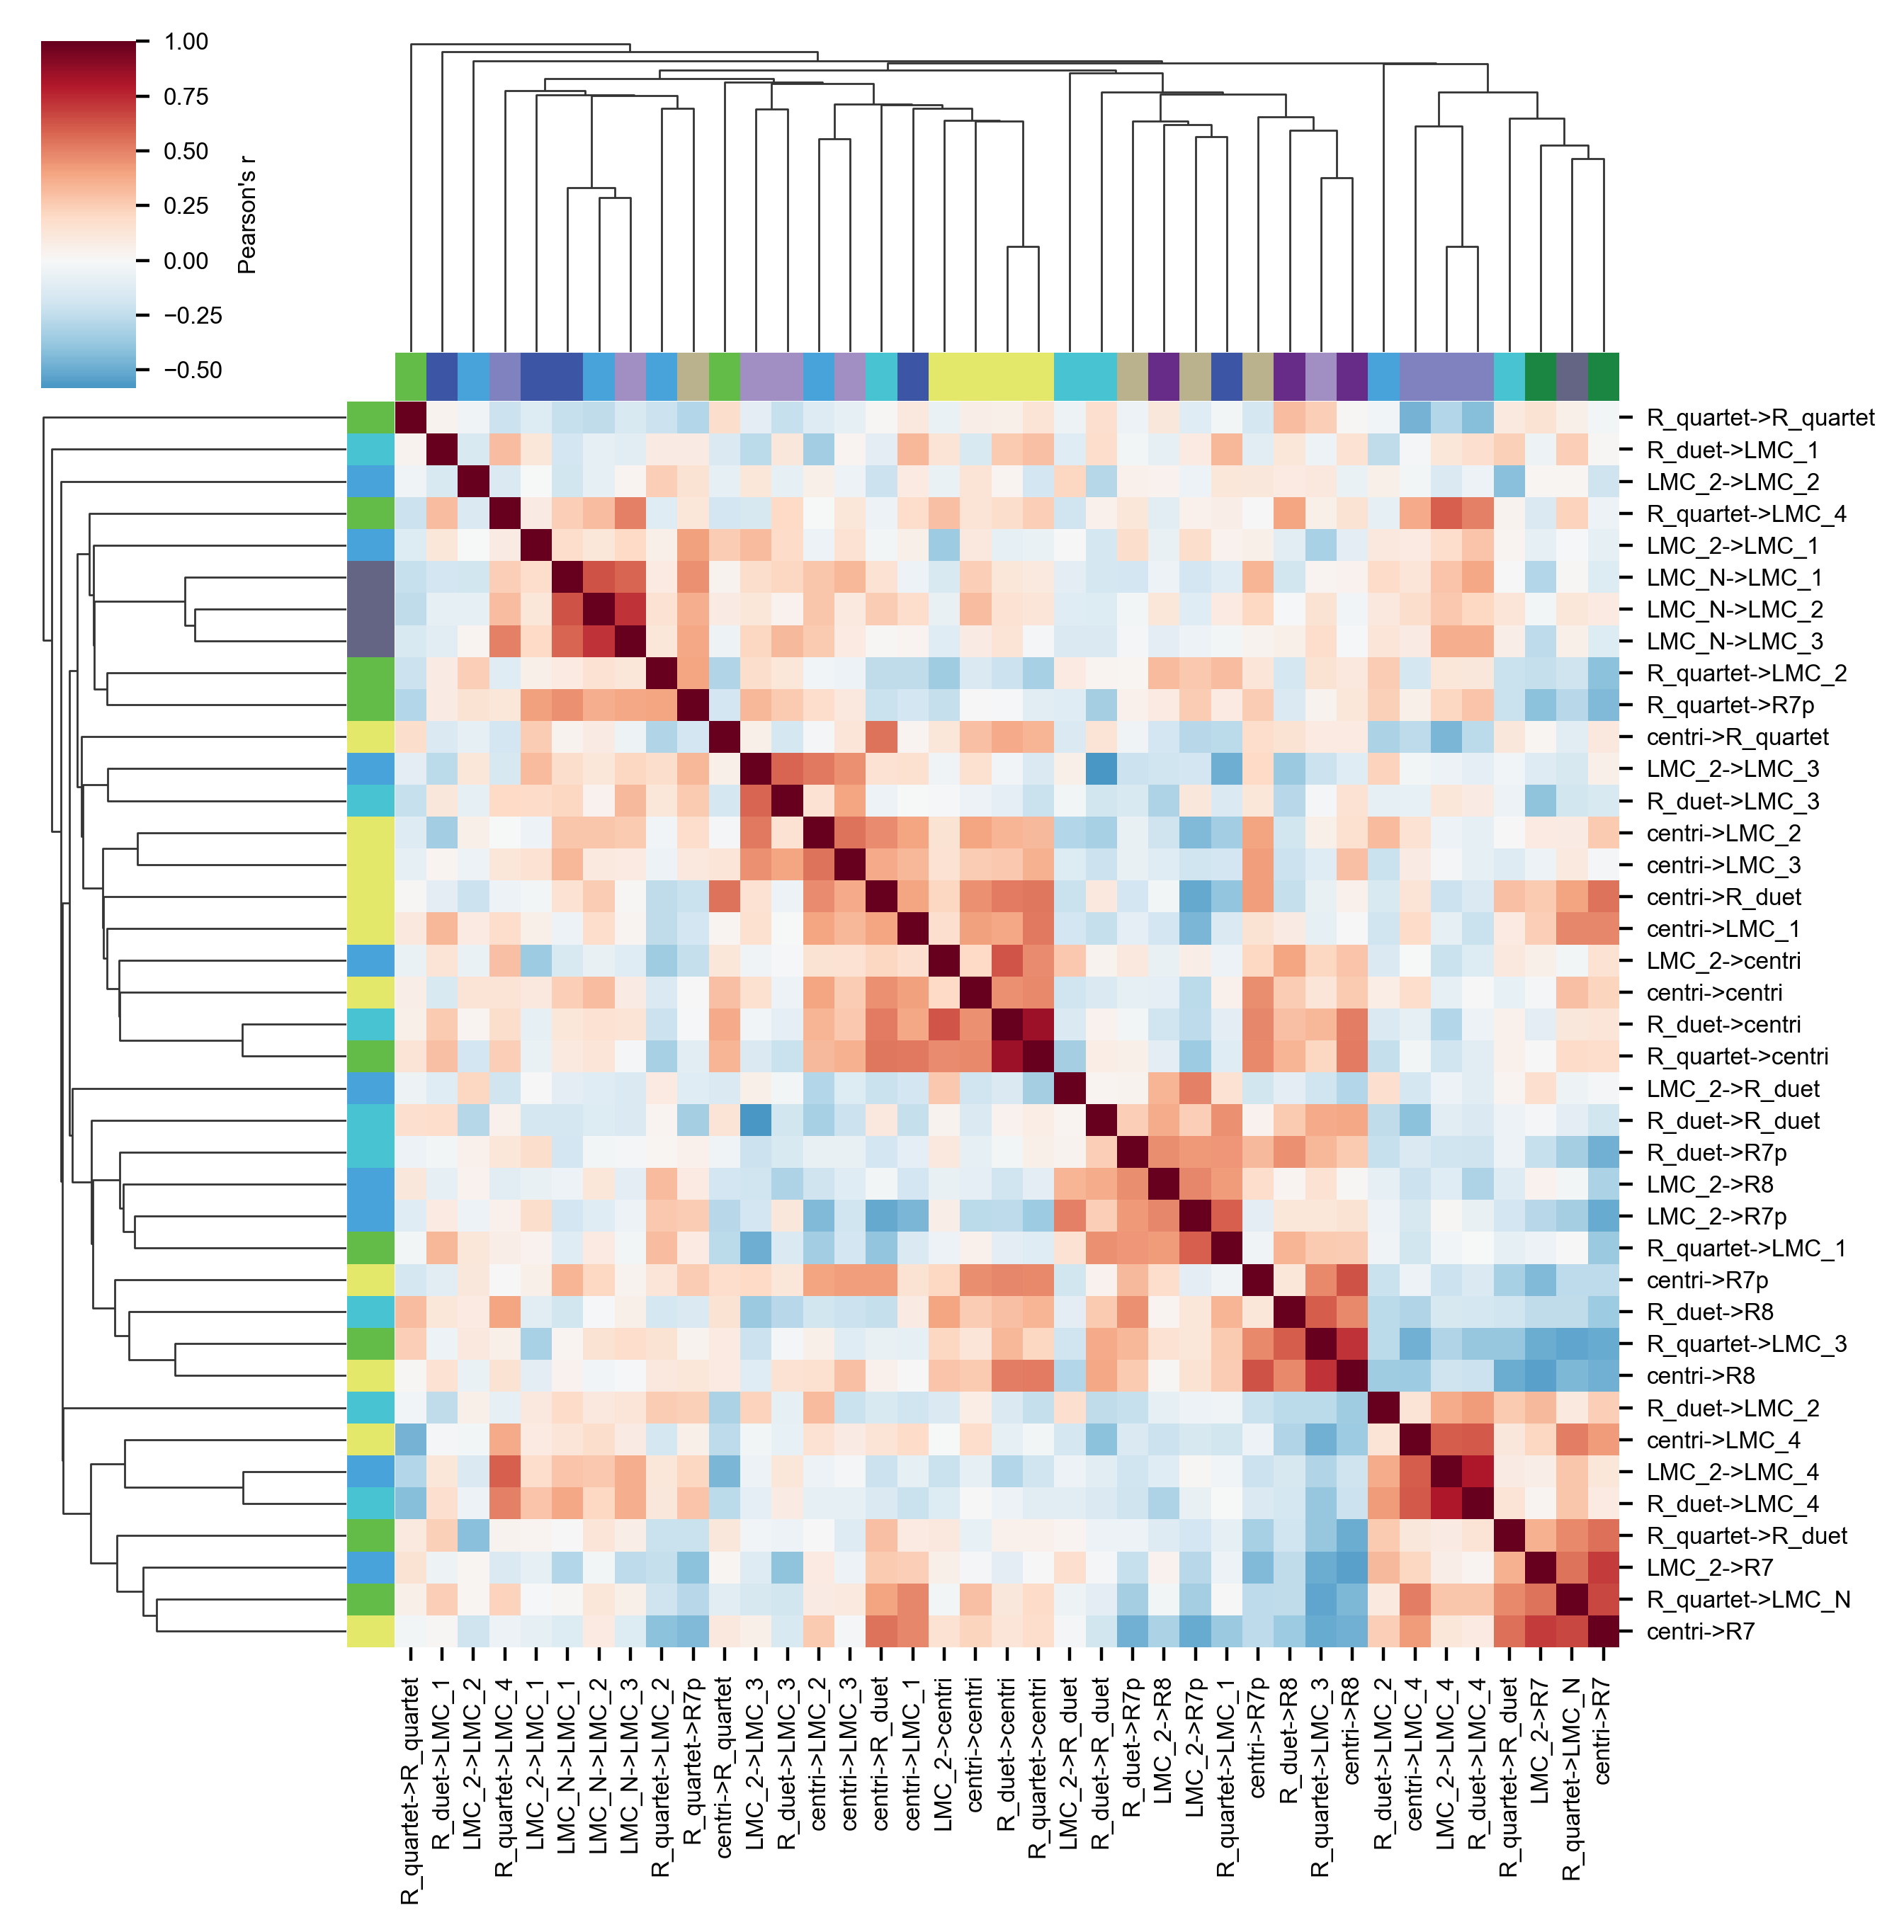

In [8]:
# EXCLUDE INTEROM CONNECTIONS
home_cx = [cx for cx in cxvecs.columns if '->e' not in cx]

data = cxvecs.filter(items=home_cx)



z = data.apply(zscore)
corr_z = z.corr()

#print(corr_z)

x_c = [cm[x.split('->')[0]] for x in corr_z.index]
y_c = [cm[x.split('->')[1]] for x in corr_z.columns]

#mask = np.triu(np.ones_like(corr_z, dtype=bool))

clus = sns.clustermap(corr_z, metric='euclidean', method='single',
                      cmap='RdBu_r', cbar_kws={'label': "Pearson's r"}, center=0,
                      row_colors=x_c, col_colors=y_c, figsize=[6.7, 6.8]) #fontdict={'fontsize': 6.0})
# 

if save_figs:
    clus.savefig(fig_path + f'cx-clus_all-cx-mean1_EXCLUDE-interom.svg')
    clus.savefig(fig_path + f'om-clus_all-cx-mean1_EXCLUDE-interom.png')

In [14]:
cx_label_mapper = dict()

for this_cx in data.columns:
    if 'centri' in str(this_cx):
        new_label = this_cx.replace('centri', 'Am')
        cx_label_mapper.update({str(this_cx): new_label})
        
print(cx_label_mapper)

{'LMC_2->centri': 'LMC_2->Am', 'R_duet->centri': 'R_duet->Am', 'R_quartet->centri': 'R_quartet->Am', 'centri->LMC_1': 'Am->LMC_1', 'centri->LMC_2': 'Am->LMC_2', 'centri->LMC_3': 'Am->LMC_3', 'centri->R7': 'Am->R7', 'centri->R7p': 'Am->R7p', 'centri->R8': 'Am->R8', 'centri->R_duet': 'Am->R_duet', 'centri->R_quartet': 'Am->R_quartet', 'centri->centri': 'Am->Am'}


{'LMC_2->centri': 'LMC_2->Am', 'R_duet->centri': 'R_duet->Am', 'R_quartet->centri': 'R_quartet->Am', 'centri->LMC_1': 'Am->LMC_1', 'centri->LMC_2': 'Am->LMC_2', 'centri->LMC_3': 'Am->LMC_3', 'centri->R7': 'Am->R7', 'centri->R7p': 'Am->R7p', 'centri->R8': 'Am->R8', 'centri->R_duet': 'Am->R_duet', 'centri->R_quartet': 'Am->R_quartet', 'centri->centri': 'Am->Am'}


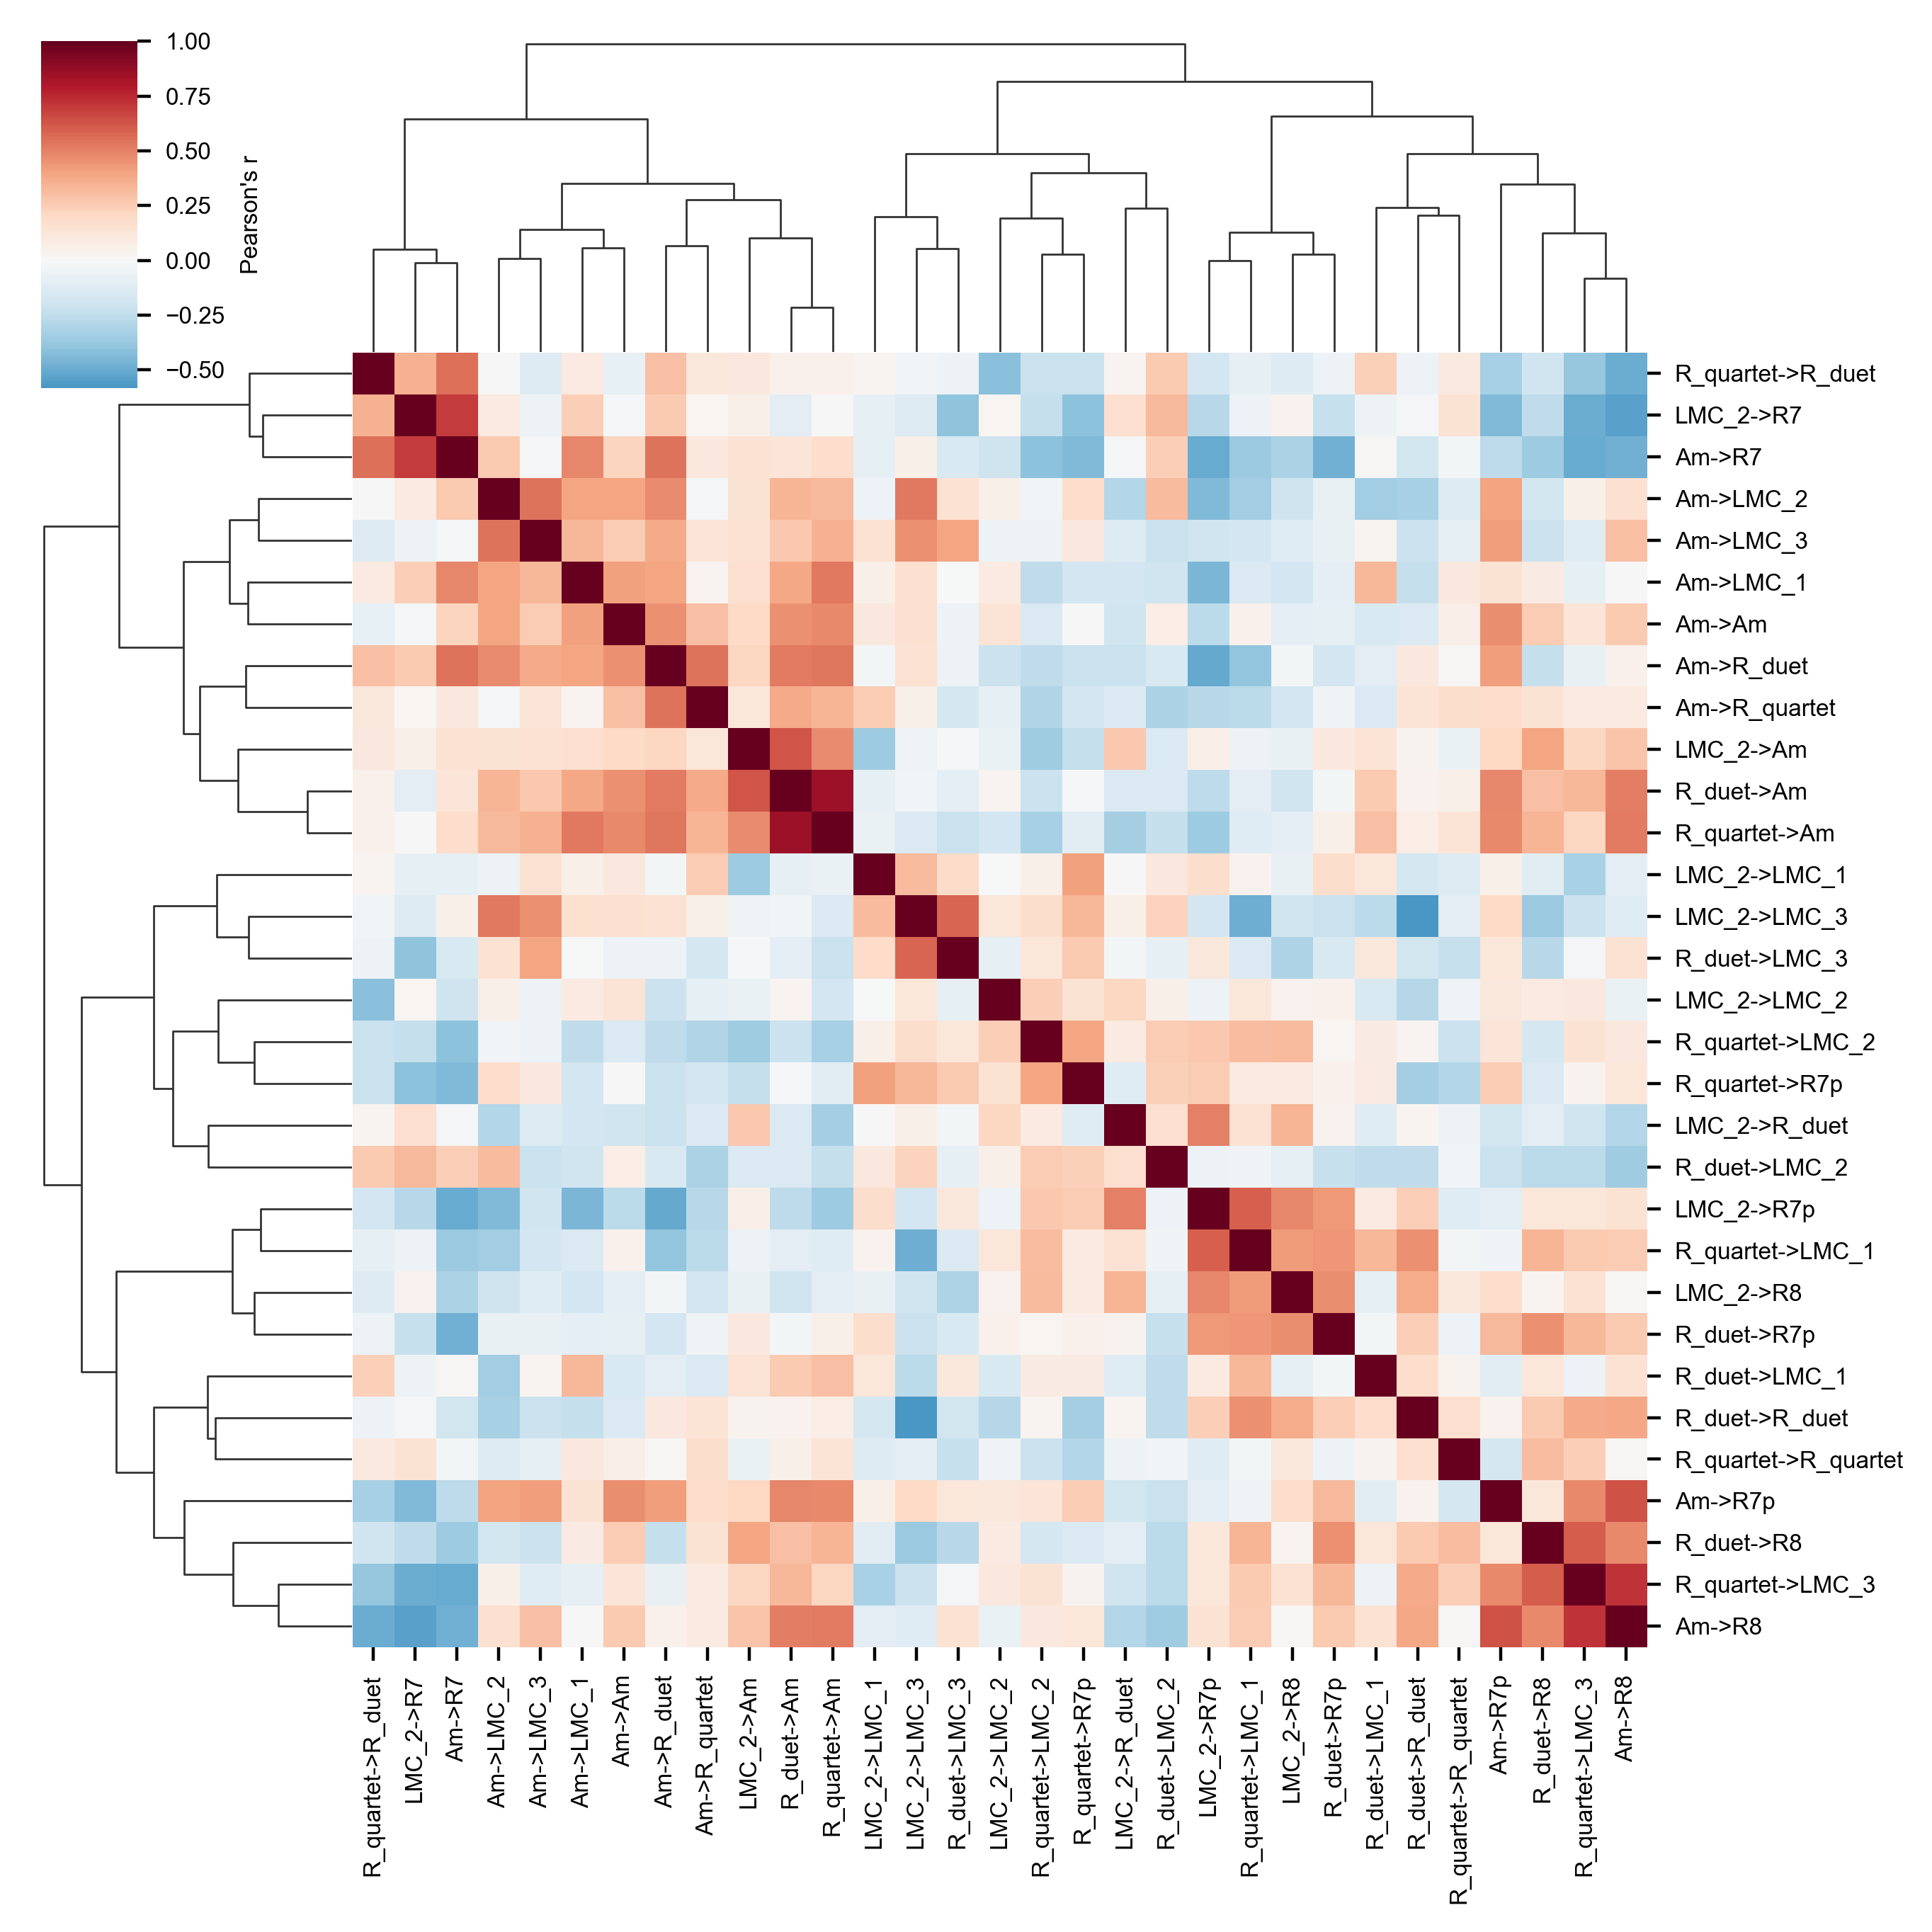

In [21]:
# EXCLUDE L4 home and interom CONNECTIONS
home_cx = [cx for cx in cxvecs.columns if '->e' not in cx]
home_canonical = [cx for cx in home_cx if 'LMC_4' not in cx]
home_canonical = [cx for cx in home_canonical if 'LMC_N' not in cx]

data = cxvecs.filter(items=home_canonical)

cx_label_mapper = dict()

for this_cx in data.columns:
    if 'centri' in str(this_cx):
        new_label = this_cx.replace('centri', 'Am')
        cx_label_mapper.update({str(this_cx): new_label})
        
print(cx_label_mapper)

data = data.rename(columns=cx_label_mapper)

z = data.apply(zscore)
corr_z = z.corr()

clus = sns.clustermap(corr_z, metric='euclidean', method='complete', center=0,
                      cmap='RdBu_r', cbar_kws={'label': "Pearson's r"}, figsize=[6.8, 6.8])
# 

if save_figs:
    clus.savefig(fig_path + f'cx-clus_EXCLUDE-interom-L4.svg')
    #clus.savefig(fig_path + f'om-clus_all-cx-mean1_EXCLUDE-interom.png')

{'LMC_2->centri': 'LMC_2->Am', 'R_duet->centri': 'R_duet->Am', 'R_quartet->centri': 'R_quartet->Am', 'centri->LMC_1': 'Am->LMC_1', 'centri->LMC_2': 'Am->LMC_2', 'centri->LMC_3': 'Am->LMC_3', 'centri->R7': 'Am->R7', 'centri->R7p': 'Am->R7p', 'centri->R8': 'Am->R8', 'centri->R_duet': 'Am->R_duet', 'centri->R_quartet': 'Am->R_quartet', 'centri->centri': 'Am->Am'}


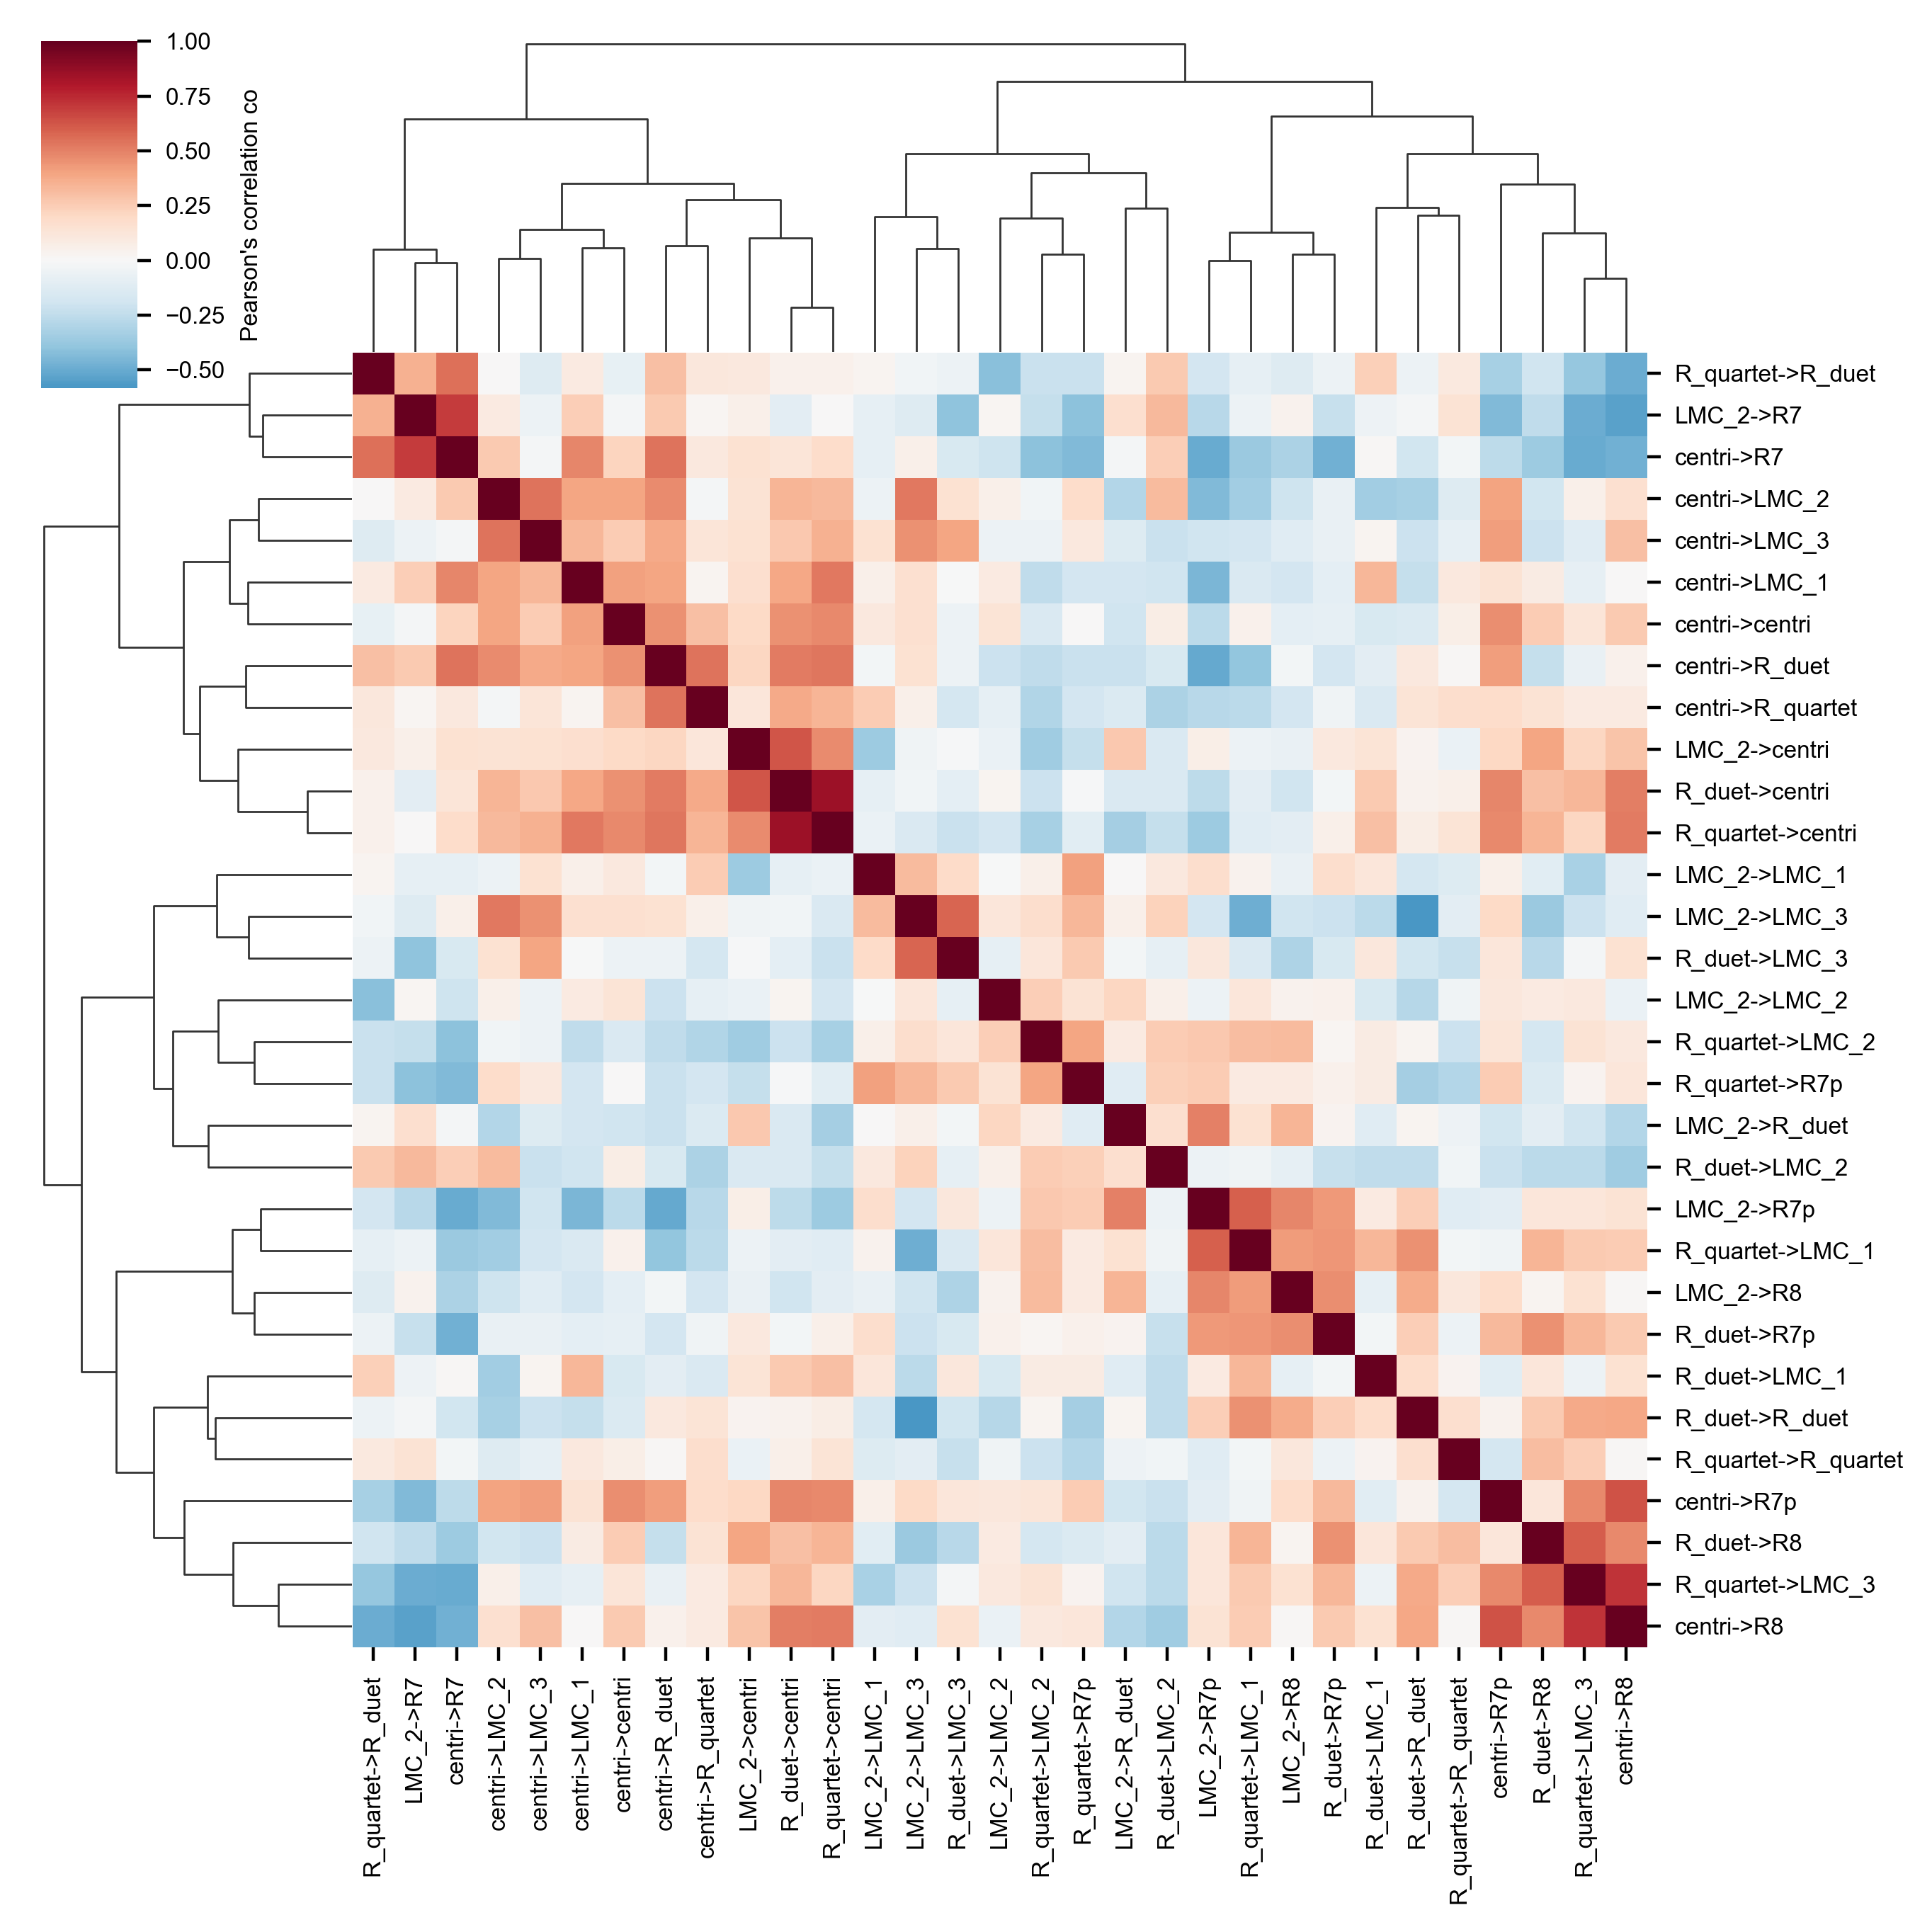

In [16]:
#print(corr_z)


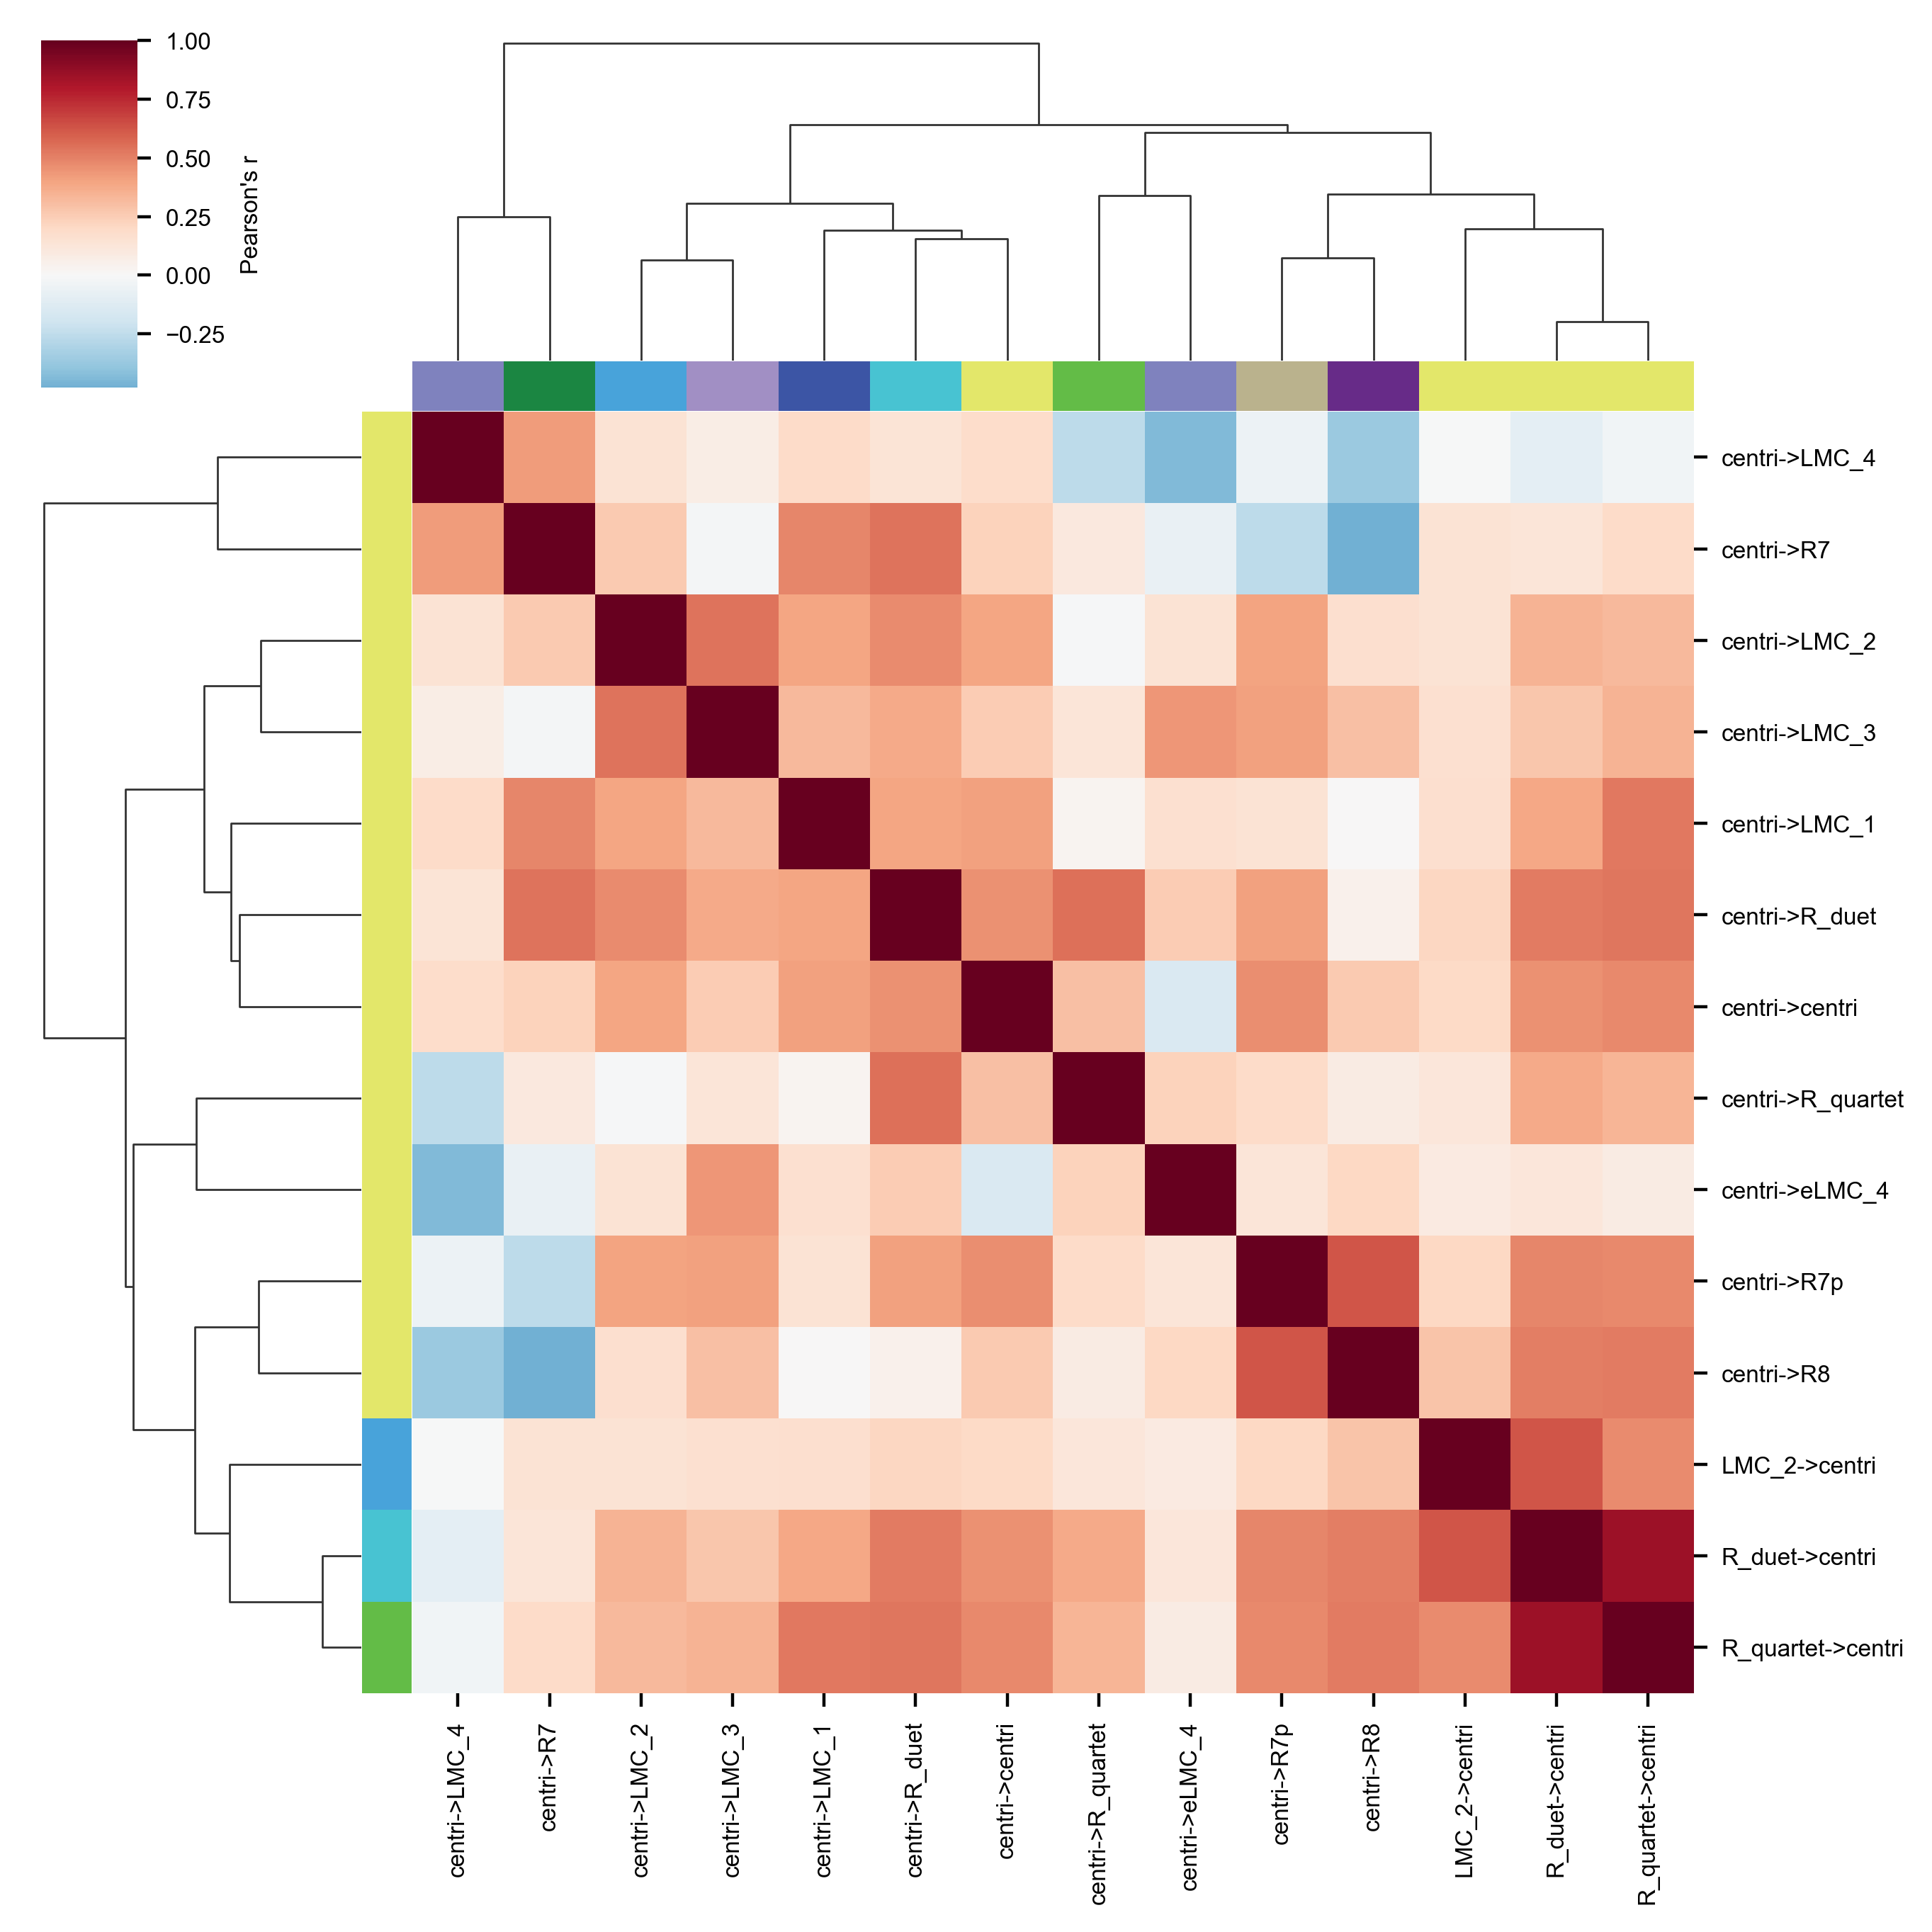

In [47]:
# EXCLUDE L4 home and interom CONNECTIONS
centri_cx = [cx for cx in cxvecs.columns if 'centri' in cx]


data = cxvecs.filter(items=centri_cx)



z = data.apply(zscore)
corr_z = z.corr()


#print(corr_z)

x_c = [cm[x.split('->')[0]] for x in corr_z.index]
y_c = [cm[x.split('->')[1]] for x in corr_z.columns]

clus = sns.clustermap(corr_z, metric='euclidean', method='complete', center=0,
                      cmap='RdBu_r', cbar_kws={'label': "Pearson's r"}, 
                      row_colors=x_c, col_colors=y_c, figsize=[6.8, 6.8]) #fontdict={'fontsize': 6.0})
# 

if save_figs:
    clus.savefig(fig_path + f'cx-clus_all-cx-mean1_EXCLUDE-interom.svg')
    clus.savefig(fig_path + f'om-clus_all-cx-mean1_EXCLUDE-interom.png')

In [31]:
clus.row_linkage

AttributeError: 'ClusterGrid' object has no attribute 'row_linkage'

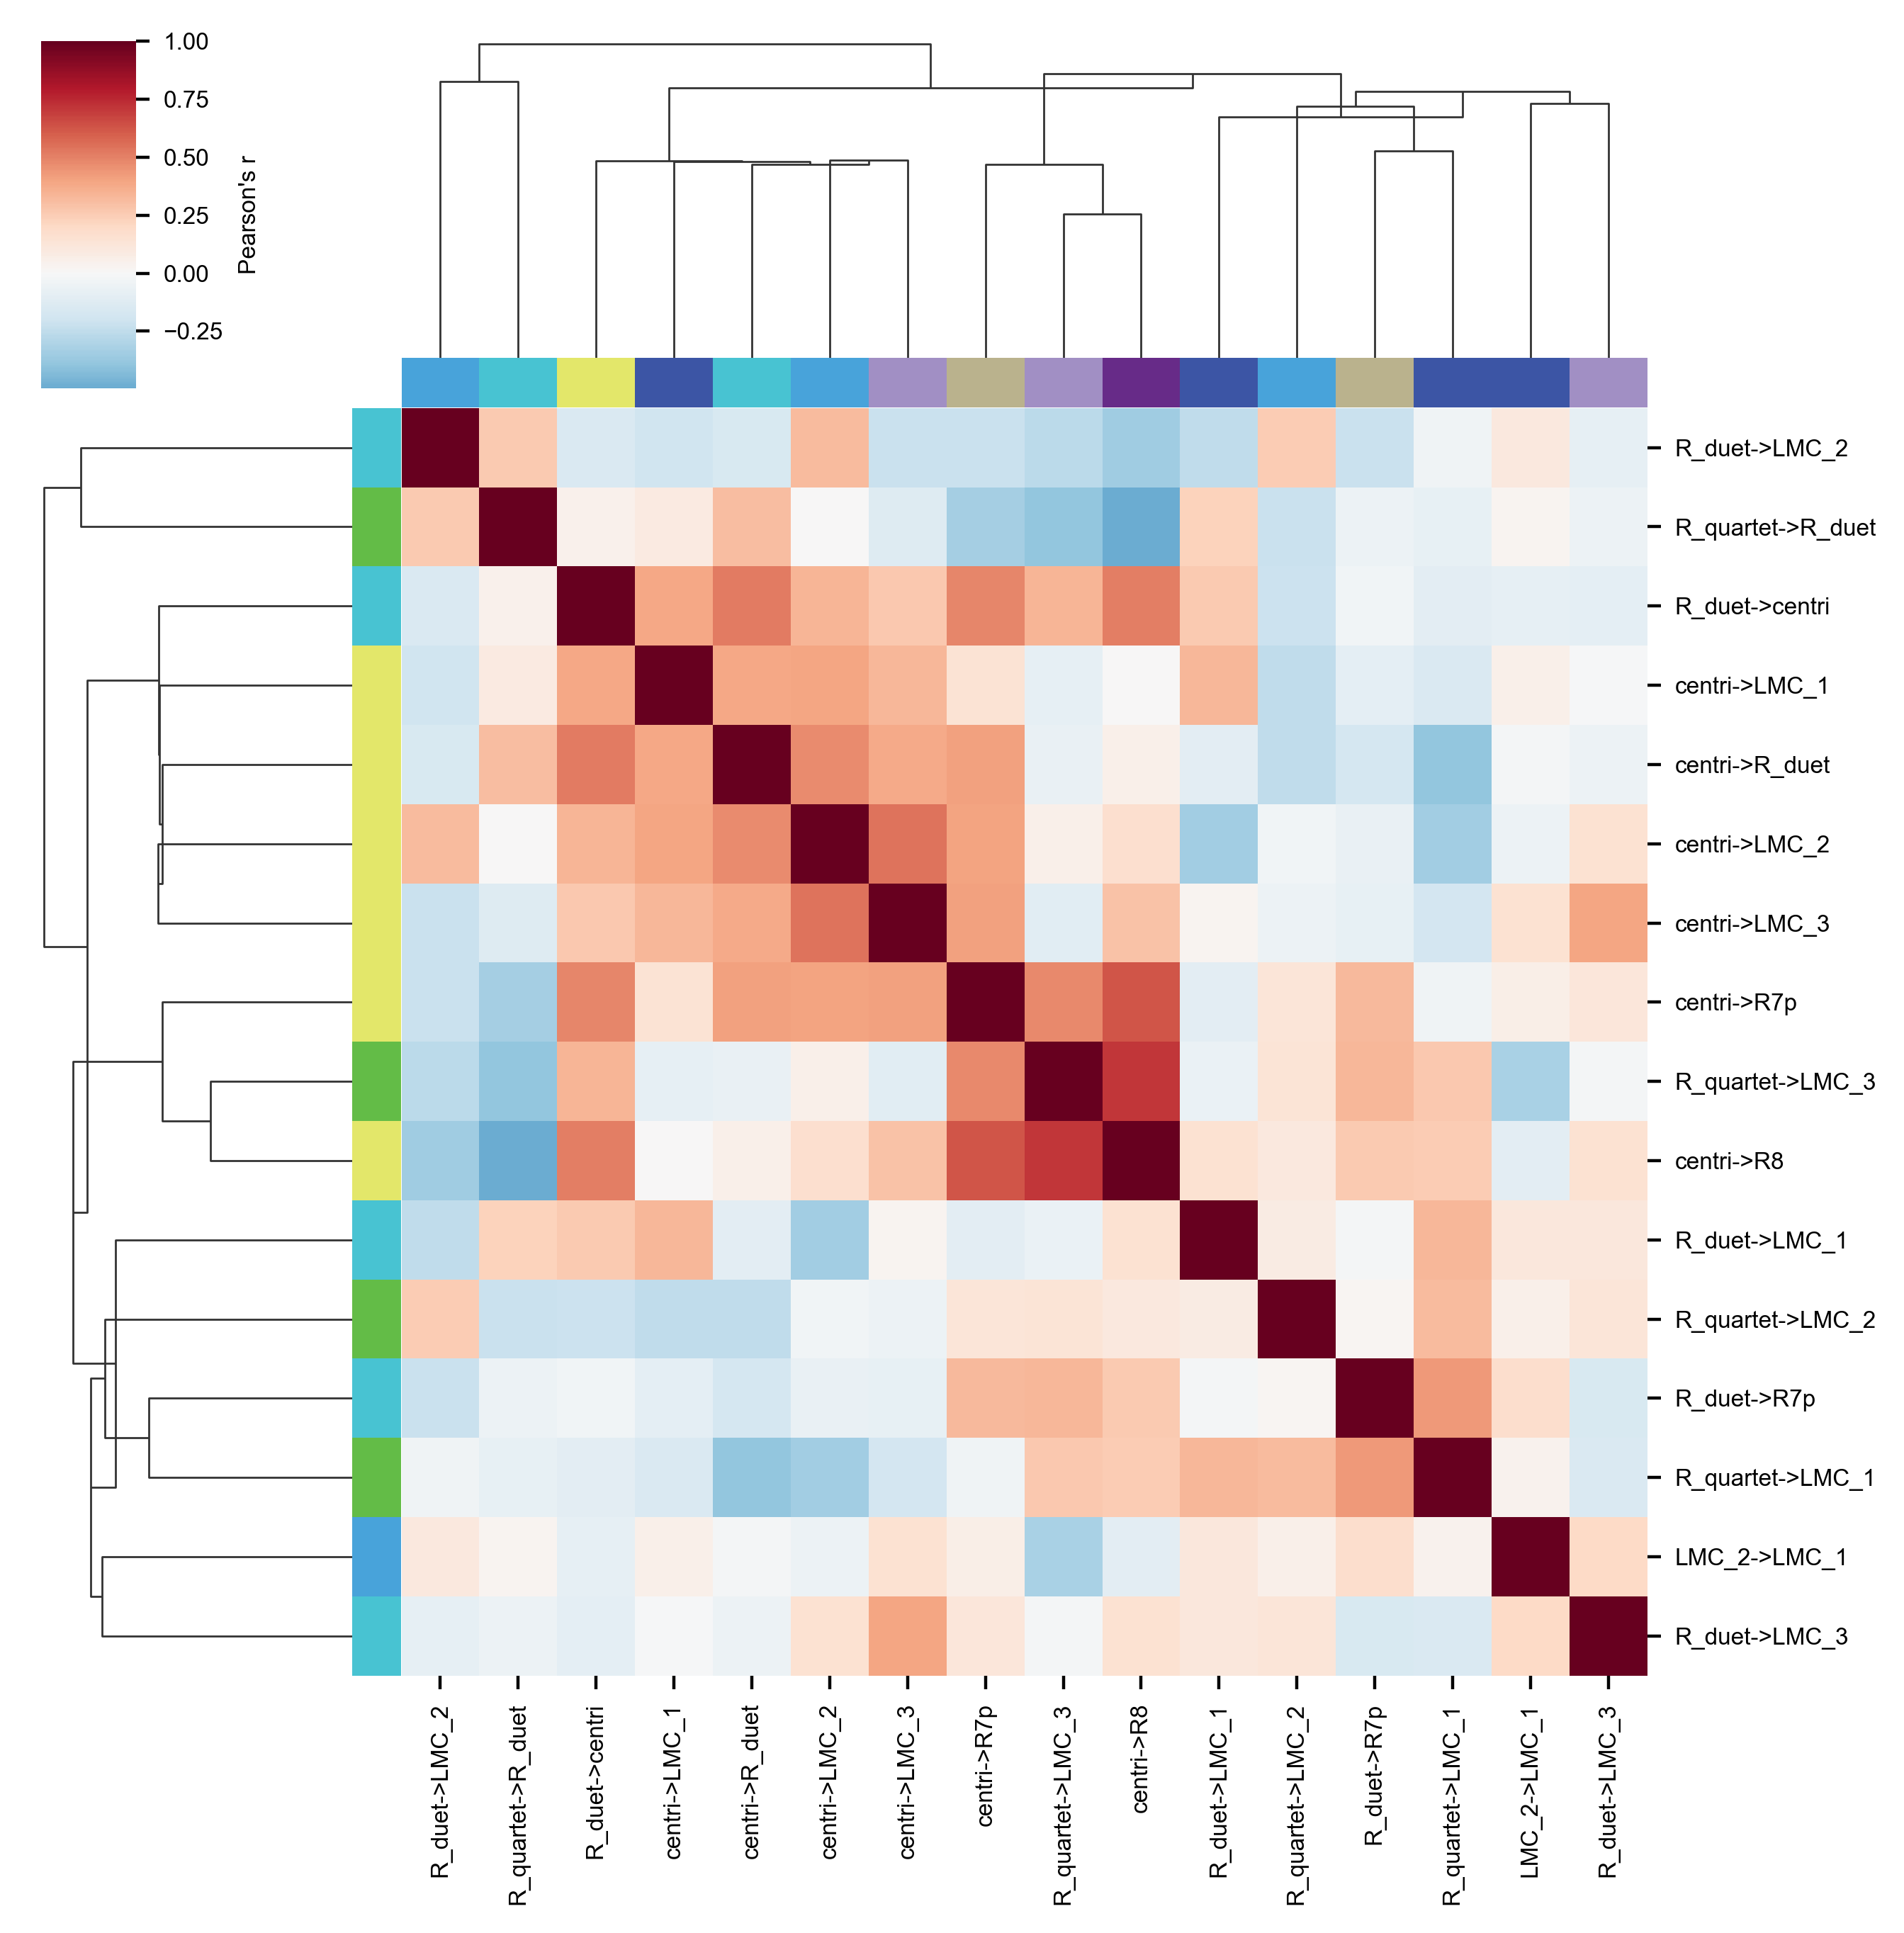

In [21]:
# EXCLUDE L4, interom, AND connections not observed in every cartridge
home_cx = [cx for cx in cxvecs.columns if '->e' not in cx]
home_canonical = [cx for cx in cxvecs.columns if 'LMC_4' not in cx]
always_present = [col for col in cxvecs if all(cxvecs[col] >= 1.0)]

data = cxvecs.filter(items=always_present)


z = data.apply(zscore)
corr_z = z.corr()


#print(corr_z)

x_c = [cm[x.split('->')[0]] for x in corr_z.index]
y_c = [cm[x.split('->')[1]] for x in corr_z.columns]

clus = sns.clustermap(corr_z, metric='euclidean', method='centroid', 
                      cmap='RdBu_r', cbar_kws={'label': "Pearson's r"}, center=0, 
                      row_colors=x_c, col_colors=y_c, figsize=[6.7, 6.8]) #fontdict={'fontsize': 6.0})
# 

if save_figs:
    clus.savefig(fig_path + f'cx-clus_all-cx-mean1_EXCLUDE-interom.svg')
    clus.savefig(fig_path + f'om-clus_all-cx-mean1_EXCLUDE-interom.png')

In [19]:
for col in cxvecs:
    if all(cxvecs[col] > 1):
        print(col)

LMC_2->LMC_1
R_duet->LMC_1
R_duet->LMC_2
R_duet->LMC_3
R_duet->R7p
R_duet->centri
R_quartet->LMC_1
R_quartet->LMC_2
R_quartet->LMC_3
R_quartet->R_duet
centri->LMC_1
centri->LMC_2
centri->LMC_3
centri->R7p
centri->R8
centri->R_duet
